Most likely hidden states: [0 0 0 0 2 2]
Log Probability: -16.592782228108433
Most likely hidden states using Viterbi: [0 0 0 0 2 2]


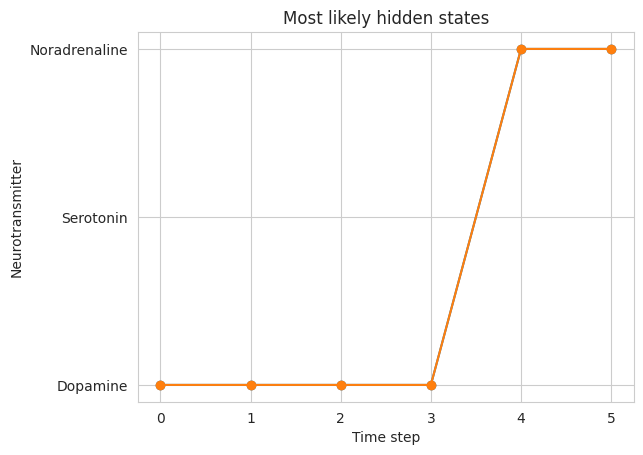

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

transition_probability = np.array([[0.6, 0.2, 0.2], [0.3, 0.4, 0.3], [0.1, 0.3, 0.6]])

emission_probability = np.array([[0.05, 0.2, 0.4, 0.05, 0.1, 0.1, 0.05, 0.05],
                                 [0.1, 0.1, 0.3, 0.05, 0.1, 0.1, 0.2, 0.05],
                                 [0.2, 0.05, 0.1, 0.2, 0.05, 0.2, 0.15, 0.05]])

model = hmm.CategoricalHMM(n_components=3, n_iter=100)
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)

hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

log_probability, hidden_states = model.decode(observations_sequence, algorithm='viterbi')
print('Log Probability:', log_probability)
print("Most likely hidden states using Viterbi:", hidden_states)

# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Dopamine or Serotonin or Noradrenaline")

state_names = ["Dopamine", "Serotonin", "Noradrenaline"]

sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Neurotransmitter')
plt.title("Most likely hidden states")
plt.yticks(range(len(state_names)), state_names)
plt.show()


ValueError: ignored